# Step 1: Data Importing

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib


In [6]:
df = pd.read_csv('/kaggle/input/student-grade-data/student/student-por.csv', sep = ';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
df = df[['sex', 'age', 'traveltime', 'studytime', 'internet', 'romantic', 'freetime', 'absences', 'G1', 'G2', 'G3']].copy()

In [9]:
df

,sex,age,traveltime,studytime,internet,romantic,freetime,absences,G1,G2,G3
0,F,18,2,2,no,no,3,4,0,11,11
1,F,17,1,2,yes,no,3,2,9,11,11
2,F,15,1,2,yes,no,3,6,12,13,12
3,F,15,1,3,yes,yes,2,0,14,14,14
4,F,16,1,2,no,no,3,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,1,3,yes,no,4,4,10,11,10
645,F,18,1,2,yes,no,3,4,15,15,16
646,F,18,2,2,no,no,1,6,11,12,9
647,M,17,2,1,yes,no,4,6,10,10,10


# Step 2: Data Visualization

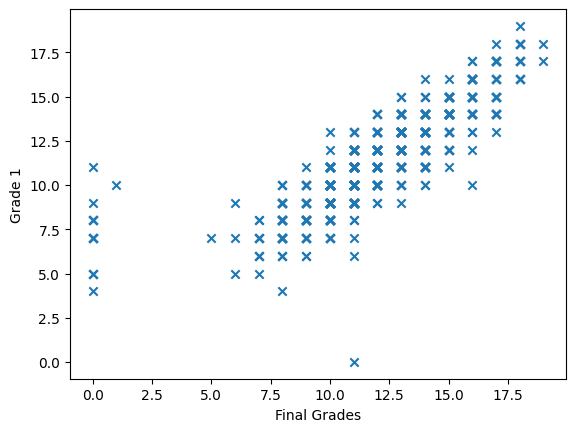

In [10]:
plt.scatter(df.G3, df.G1, marker= 'x')
plt.xlabel('Final Grades')
plt.ylabel('Grade 1')
plt.show()

In [11]:
df.drop(df[(df.G1 > 0) & (df.G3 < 2)].index, inplace = True)

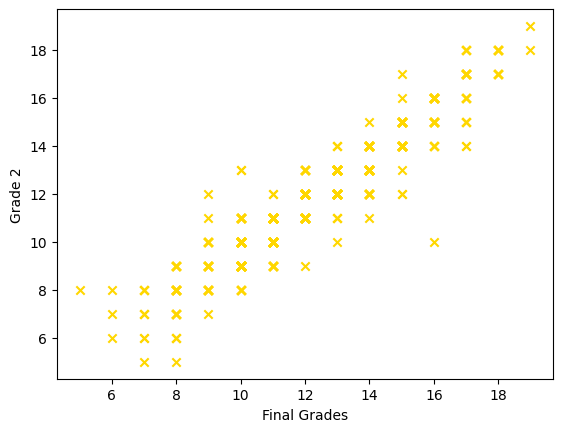

In [12]:
plt.scatter(df.G3, df.G2, marker= 'x', color='gold')
plt.xlabel('Final Grades')
plt.ylabel('Grade 2')
plt.show()

In [13]:
df.drop(df[(df.G2 > 0) & (df.G3 == 0)].index, inplace = True)

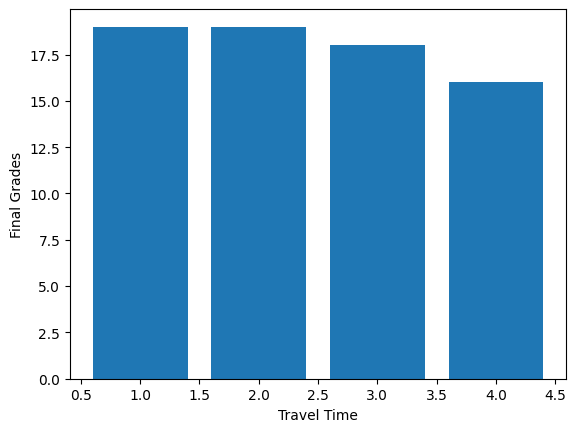

In [14]:
plt.bar(df.traveltime, df.G3)
plt.ylabel('Final Grades')
plt.xlabel('Travel Time')
plt.show()

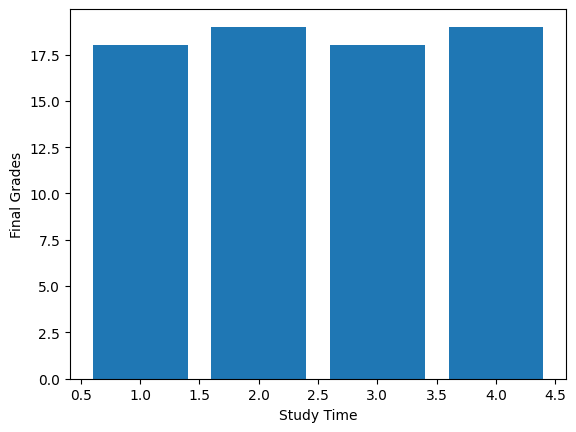

In [15]:
plt.bar(df.studytime, df.G3)
plt.ylabel('Final Grades')
plt.xlabel('Study Time')
plt.show()

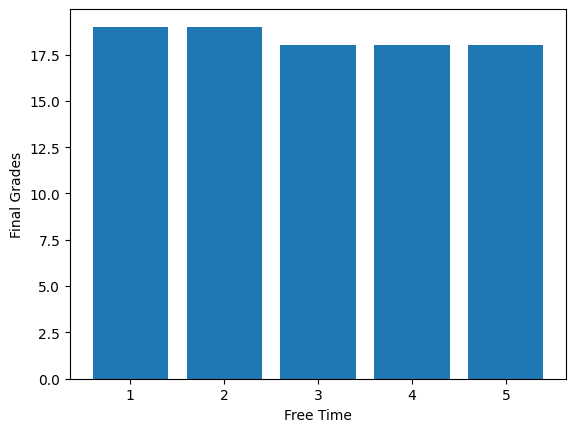

In [16]:
plt.bar(df.freetime, df.G3)
plt.ylabel('Final Grades')
plt.xlabel('Free Time')
plt.show()

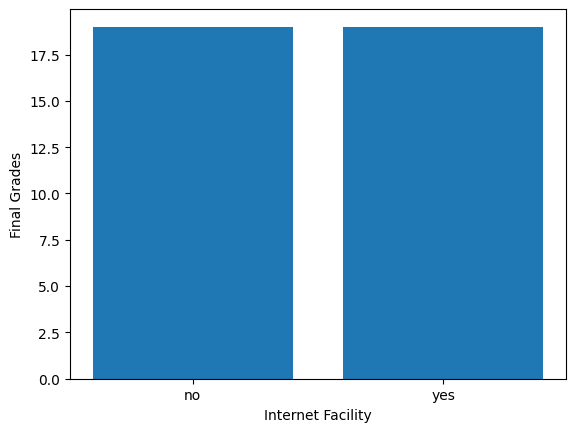

In [17]:
plt.bar(df.internet, df.G3)
plt.ylabel('Final Grades')
plt.xlabel('Internet Facility')
plt.show()

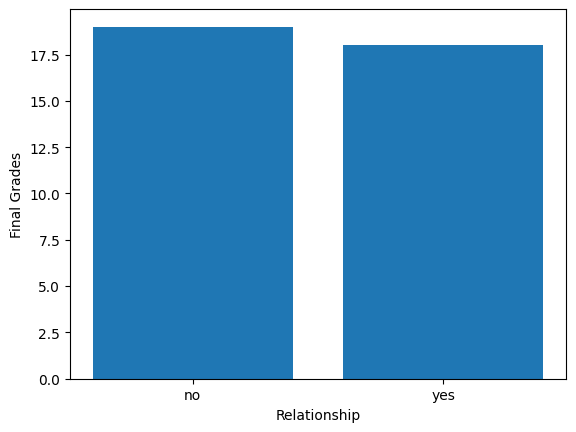

In [18]:
plt.bar(df.romantic, df.G3)
plt.ylabel('Final Grades')
plt.xlabel('Relationship')
plt.show()

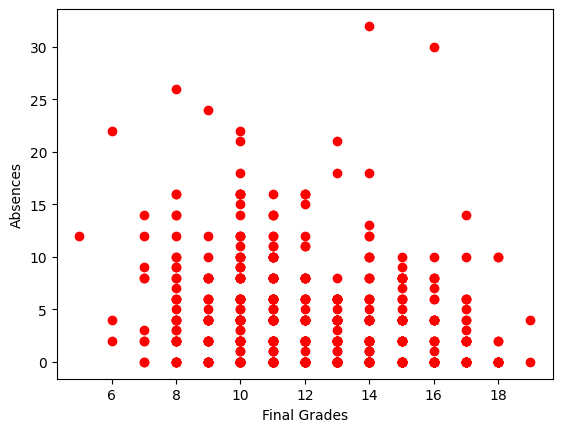

In [19]:
plt.plot(df.G3, df.absences, 'o', color='red')
plt.xlabel('Final Grades')
plt.ylabel('Absences')
plt.show()

# Step 3: Data Preprocessing

In [20]:
df.dtypes

sex           object
age            int64
traveltime     int64
studytime      int64
internet      object
romantic      object
freetime       int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [21]:
def replace_yesno(columns, dataframe):
    for col in columns:
        dataframe[col].replace({'yes': 1, 'no': 0}, inplace = True)

yes_no_columns = ['internet', 'romantic']
replace_yesno(yes_no_columns, df)

/tmp/ipykernel_33/3050325537.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[col].replace({'yes': 1, 'no': 0}, inplace = True)
/tmp/ipykernel_33/3050325537.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe[col].replace({'yes': 1, 'no': 0}, inplace = True)


In [22]:
df.dtypes

sex           object
age            int64
traveltime     int64
studytime      int64
internet       int64
romantic       int64
freetime       int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [23]:
def replace_sex(dataframe):
    dataframe['sex'].replace({'M': 1, 'F': 0}, inplace = True) #changing male to 0 and female to 1

replace_sex(df)

/tmp/ipykernel_33/3224276225.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['sex'].replace({'M': 1, 'F': 0}, inplace = True) #changing male to 0 and female to 1
/tmp/ipykernel_33/3224276225.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['sex'].replace({'M': 1, 'F': 0}, 

In [24]:
df.dtypes

sex           int64
age           int64
traveltime    int64
studytime     int64
internet      int64
romantic      int64
freetime      int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [25]:
for col in df:
    print(f"{col}: {df[col].unique()}")

sex: [0 1]
age: [18 17 15 16 19 22 20 21]
traveltime: [2 1 3 4]
studytime: [2 3 1 4]
internet: [0 1]
romantic: [0 1]
freetime: [3 2 4 1 5]
absences: [ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]
G1: [ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]
G2: [11 13 14 12 16 17  8 10 15  9  7  6 18 19  5]
G3: [11 12 14 13 17 15  7 10 16  9  8 18  6  5 19]


In [26]:
scaler_x = MinMaxScaler()
def scale_x(columns, dataframe):
    dataframe[columns] = scaler_x.fit_transform(dataframe[columns])

scale_col = ['age', 'absences', 'G1', 'G2']
scale_x(scale_col, df)

scaler_y = MinMaxScaler()
df['G3'] = scaler_y.fit_transform(df[['G3']])

In [27]:
#traveltime, studytime, freetime = {1 - <15 min.,
#                                   2 - 15 to 30 min.,
#                                   3 - 30 min. to 1 hour,
#                                   4 - 1 hour to 2 hour, 
#                                   5 - >2 hour}
def replace_dummy(columns, dataframe):
    for col in columns:
        dataframe[col].replace({1: '<15 min.', 
                         2: '15 to 30 min.',
                         3: '30 min. to 1 hour',
                         4: '1 hour to 2 hour',
                         5: '>2 hour'}, inplace = True)

dummy_cols = ['traveltime', 'studytime', 'freetime']
replace_dummy(dummy_cols, df)

/tmp/ipykernel_33/1428531410.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[col].replace({1: '<15 min.',


In [28]:
df = pd.get_dummies(data= df, columns = dummy_cols)

In [29]:
df.columns

Index(['sex', 'age', 'internet', 'romantic', 'absences', 'G1', 'G2', 'G3',
       'traveltime_1 hour to 2 hour', 'traveltime_15 to 30 min.',
       'traveltime_30 min. to 1 hour', 'traveltime_<15 min.',
       'studytime_1 hour to 2 hour', 'studytime_15 to 30 min.',
       'studytime_30 min. to 1 hour', 'studytime_<15 min.',
       'freetime_1 hour to 2 hour', 'freetime_15 to 30 min.',
       'freetime_30 min. to 1 hour', 'freetime_<15 min.', 'freetime_>2 hour'],
      dtype='object')

In [30]:
bool_columns = df[['traveltime_1 hour to 2 hour', 'traveltime_15 to 30 min.', 'traveltime_30 min. to 1 hour', 'traveltime_<15 min.',
                'studytime_1 hour to 2 hour', 'studytime_15 to 30 min.', 'studytime_30 min. to 1 hour', 'studytime_<15 min.', 
                'freetime_1 hour to 2 hour', 'freetime_15 to 30 min.', 'freetime_30 min. to 1 hour', 'freetime_<15 min.', 'freetime_>2 hour']]

for col in bool_columns:
    df[col] = df[col].astype('int64')

In [31]:
df.dtypes

sex                               int64
age                             float64
internet                          int64
romantic                          int64
absences                        float64
G1                              float64
G2                              float64
G3                              float64
traveltime_1 hour to 2 hour       int64
traveltime_15 to 30 min.          int64
traveltime_30 min. to 1 hour      int64
traveltime_<15 min.               int64
studytime_1 hour to 2 hour        int64
studytime_15 to 30 min.           int64
studytime_30 min. to 1 hour       int64
studytime_<15 min.                int64
freetime_1 hour to 2 hour         int64
freetime_15 to 30 min.            int64
freetime_30 min. to 1 hour        int64
freetime_<15 min.                 int64
freetime_>2 hour                  int64
dtype: object

# Step 4: Model Declaration

In [32]:
x = df.drop('G3', axis = 1)
y = df[['G3']]
x.columns

Index(['sex', 'age', 'internet', 'romantic', 'absences', 'G1', 'G2',
       'traveltime_1 hour to 2 hour', 'traveltime_15 to 30 min.',
       'traveltime_30 min. to 1 hour', 'traveltime_<15 min.',
       'studytime_1 hour to 2 hour', 'studytime_15 to 30 min.',
       'studytime_30 min. to 1 hour', 'studytime_<15 min.',
       'freetime_1 hour to 2 hour', 'freetime_15 to 30 min.',
       'freetime_30 min. to 1 hour', 'freetime_<15 min.', 'freetime_>2 hour'],
      dtype='object')

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()

In [35]:
model.fit(x_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(x_test)

In [37]:
joblib.dump(model, 'student_grades_model.pkl')
joblib.dump(scaler_x, 'scaler_x.pkl')

['scaler_x.pkl']

In [38]:
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

# Step 5: Model Evaluation

In [39]:
mse = mean_squared_error(y_test, y_pred)

print(f'MSE: {mse:.4f}')

MSE: 0.0040


In [40]:
# Load the model and scaler
model = joblib.load('student_grades_model.pkl')
scaler_x = joblib.load('scaler_x.pkl')

In [41]:
def get_user_input():
    sex = input("Enter sex (male/female): ")
    age = float(input("Enter age: "))
    internet = input("Do you have internet access at home (yes/no): ")
    romantic = input("Are you in a romantic relationship (yes/no): ")
    absences = int(input("Number of absences: "))
    G1 = float(input("First period grade: "))
    G2 = float(input("Second period grade: "))
    traveltime = input("Travel time (options: '1 hour to 2 hour', '15 to 30 min.', '30 min. to 1 hour', '<15 min.'): ")
    studytime = input("Study time (options: '1 hour to 2 hour', '15 to 30 min.', '30 min. to 1 hour', '<15 min.'): ")
    freetime = input("Free time (options: '1 hour to 2 hour', '15 to 30 min.', '30 min. to 1 hour', '>2 hour'): ")

    # Convert categorical inputs to numerical
    sex = 1 if sex.lower() == 'male' else 0
    internet = 1 if internet.lower() == 'yes' else 0
    romantic = 1 if romantic.lower() == 'yes' else 0

    # Create a dictionary of the inputs
    input_data = {
        'sex': sex,
        'age': age,
        'internet': internet,
        'romantic': romantic,
        'absences': absences,
        'G1': G1,
        'G2': G2,
        'traveltime': traveltime,
        'studytime': studytime,
        'freetime': freetime
    }

    # Convert to the format your model expects
    input_list = [
        input_data['sex'],
        input_data['age'],
        input_data['internet'],
        input_data['romantic'],
        input_data['absences'],
        input_data['G1'],
        input_data['G2']
    ]

    # Add one-hot encoding for categorical variables
    traveltime_mapping = {
        '1 hour to 2 hour': [0, 0, 0, 1],
        '15 to 30 min.': [0, 1, 0, 0],
        '30 min. to 1 hour': [0, 0, 1, 0],
        '<15 min.': [1, 0, 0, 0]
    }
    studytime_mapping = {
        '1 hour to 2 hour': [0, 0, 0, 1],
        '15 to 30 min.': [0, 1, 0, 0],
        '30 min. to 1 hour': [0, 0, 1, 0],
        '<15 min.': [1, 0, 0, 0]
    }
    freetime_mapping = {
        '1 hour to 2 hour': [0, 0, 0, 1, 0],
        '15 to 30 min.': [0, 1, 0, 0, 0],
        '30 min. to 1 hour': [0, 0, 1, 0, 0],
        '>2 hour': [0, 0, 0, 0, 1],
        '<15 min.': [1, 0, 0, 0, 0]
    }

    input_list.extend(traveltime_mapping[input_data['traveltime']])
    input_list.extend(studytime_mapping[input_data['studytime']])
    input_list.extend(freetime_mapping[input_data['freetime']])

    return [input_list]



In [42]:
user_input = get_user_input()

Enter sex (male/female):  male
Enter age:  18
Do you have internet access at home (yes/no):  yes
Are you in a romantic relationship (yes/no):  no
Number of absences:  2
First period grade:  15
Second period grade:  16
Travel time (options: '1 hour to 2 hour', '15 to 30 min.', '30 min. to 1 hour', '<15 min.'):  <15 min.
Study time (options: '1 hour to 2 hour', '15 to 30 min.', '30 min. to 1 hour', '<15 min.'):  30 min. to 1 hour
Free time (options: '1 hour to 2 hour', '15 to 30 min.', '30 min. to 1 hour', '>2 hour'):  30 min. to 1 hour


In [43]:
to_scale = [user_input[0][1], user_input[0][4], user_input[0][5], user_input[0][6]]

scaled_features = scaler_x.transform([to_scale])[0]

user_input[0][1] = scaled_features[0]
user_input[0][5] = scaled_features[1]
user_input[0][6] = scaled_features[2]

print(user_input)
prediction = model.predict(user_input)

# Inverse transform the prediction to the original scale
prediction = scaler_y.inverse_transform(prediction.reshape(-1, 1))[0, 0]
real_prediction = f'{round(prediction, 2)}'


[[1, 0.4285714285714284, 1, 0, 2, 0.0625, 0.7894736842105263, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
real_prediction = float(real_prediction)

In [46]:
print(f"Predicted grade: {round(real_prediction * 5)} %")

Predicted grade: 68 %
